In [165]:
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

filepath = os.path.join('Resources', 'countries.csv')
eco_csv = pd.read_csv(filepath, header=0)
eco_csv.head()

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
0,Afghanistan,Middle East/Central Asia,29.82,0.46,$614.66,0.30,0.20,0.08,0.18,0.00,...,0.24,0.20,0.02,0.00,0.04,0.50,-0.30,0.46,1.60,6
1,Albania,Northern/Eastern Europe,3.16,0.73,"$4,534.37",0.78,0.22,0.25,0.87,0.02,...,0.55,0.21,0.29,0.07,0.06,1.18,-1.03,1.27,1.87,6
2,Algeria,Africa,38.48,0.73,"$5,430.57",0.60,0.16,0.17,1.14,0.01,...,0.24,0.27,0.03,0.01,0.03,0.59,-1.53,1.22,3.61,5
3,Angola,Africa,20.82,0.52,"$4,665.91",0.33,0.15,0.12,0.20,0.09,...,0.20,1.42,0.64,0.26,0.04,2.55,1.61,0.54,0.37,6
4,Antigua and Barbuda,Latin America,0.09,0.78,"$13,205.10",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.94,-4.44,3.11,5.70,2


In [166]:
# New dataframe with only GDP, HDI & Footprint
my_df = pd.DataFrame(eco_csv.iloc[:,[0,1,2,3,4,10,17]])
my_df['GDP per Capita'] = my_df['GDP per Capita'].str.replace('$','')
my_df['GDP per Capita'] = my_df['GDP per Capita'].str.replace(',','')
my_df['GDP per Capita'] = my_df['GDP per Capita'].astype(float)
my_df['Footprint per Mil Persons'] = my_df['Total Ecological Footprint']/my_df['Population (millions)']
my_df.dropna(how='any', inplace=True)
# my_df.count()
# my_df.dtypes
my_df.head()

,Country,Region,Population (millions),HDI,GDP per Capita,Total Ecological Footprint,Biocapacity Deficit or Reserve,Footprint per Mil Persons
0,Afghanistan,Middle East/Central Asia,29.82,0.46,614.66,0.79,-0.30,0.026492
1,Albania,Northern/Eastern Europe,3.16,0.73,4534.37,2.21,-1.03,0.699367
2,Algeria,Africa,38.48,0.73,5430.57,2.12,-1.53,0.055094
3,Angola,Africa,20.82,0.52,4665.91,0.93,1.61,0.044669
4,Antigua and Barbuda,Latin America,0.09,0.78,13205.10,5.38,-4.44,59.777778


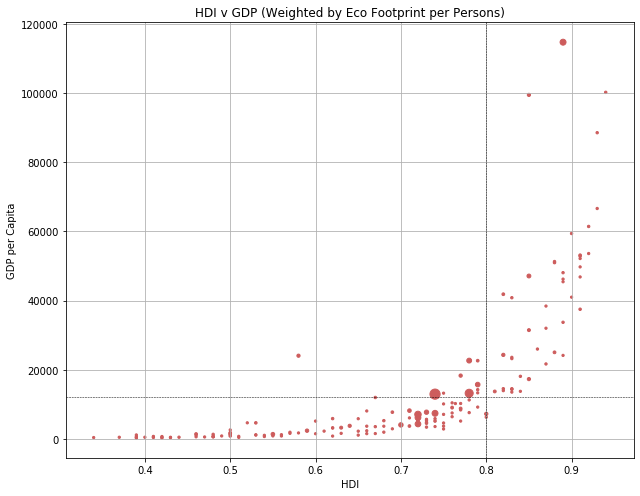

In [188]:
# Scatter plot of HDI v GDP weighted by Footprint
hdi = my_df['HDI'].tolist()
gdp = my_df['GDP per Capita'].tolist()
# bdr = my_df['Biocapacity Deficit or Reserve'].tolist()
footprint = my_df['Footprint per Mil Persons'].tolist()
footprint = [dot+5 for dot in footprint]

fig, ax = plt.subplots(figsize=(9,7))
plt.scatter(hdi, gdp, s=footprint, color='indianred')
plt.title('HDI v GDP (Weighted by Eco Footprint per Persons)')
plt.xlabel('HDI')
plt.ylabel('GDP per Capita')
plt.grid()
plt.axhline(y=12000, linewidth=0.5, linestyle = '--', color='black')
plt.axvline(x=0.80, linewidth=0.5, linestyle = '--', color='black')
plt.tight_layout()
plt.savefig('Images/footprint_development.png')
plt.show()


In [169]:
# Developing Countries with HDI Between 0.7 & 0.8
developing = my_df.loc[(my_df['HDI']>0.7) & (my_df['HDI']<0.8),:]
developing = developing.sort_values('Region')
developing.reset_index(inplace=True, drop=True)
developing

,Country,Region,Population (millions),HDI,GDP per Capita,Total Ecological Footprint,Biocapacity Deficit or Reserve,Footprint per Mil Persons
0,Algeria,Africa,38.48,0.730000,5430.57,2.12,-1.53,0.055094
1,Tunisia,Africa,10.88,0.720000,4305.07,2.34,-1.40,0.215074
2,Libyan Arab Jamahiriya,Africa,6.16,0.740000,5859.43,3.69,-3.00,0.599026
3,Mauritius,Africa,1.24,0.770000,8811.15,3.46,-2.75,2.790323
4,Fiji,Asia-Pacific,0.88,0.720000,4201.37,2.90,-0.52,3.295455
5,Tonga,Asia-Pacific,0.10,0.720000,4330.90,2.70,-1.22,27.000000
6,Sri Lanka,Asia-Pacific,21.10,0.750000,2880.03,1.32,-0.88,0.062559
7,Malaysia,Asia-Pacific,29.24,0.770000,10252.60,3.71,-1.30,0.126881
8,China,Asia-Pacific,1408.04,0.720000,5560.94,3.38,-2.44,0.002400
9,Mongolia,Asia-Pacific,2.80,0.710000,3736.07,6.08,9.58,2.171429


In [182]:
# Developed Countries with HDI > 0.8
developed = my_df.loc[(my_df['HDI']>0.8),:]
developed.count()

Country                           43
Region                            43
Population (millions)             43
HDI                               43
GDP per Capita                    43
Total Ecological Footprint        43
Biocapacity Deficit or Reserve    43
Footprint per Mil Persons         43
dtype: int64